In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
%matplotlib inline

/home/vasia/anaconda2/envs/p3env/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Question1

In [2]:
sildta = pd.read_csv('data/Reveal_EEO1_for_2016.csv')
sildta = sildta[(sildta.job_category.str.contains('Totals')==False)]
sildta = sildta[(sildta.job_category.str.contains('Previous_totals')==False)]
sildta['count']= sildta['count'].astype('int64')
sildta.head(3)

,company,year,race,gender,job_category,count
0,23andMe,2016,Latino,male,Executive/Senior officials & Mgrs,0
1,23andMe,2016,Latino,male,First/Mid officials & Mgrs,1
2,23andMe,2016,Latino,male,Professionals,7


In [3]:
male_sildta = sildta[sildta['gender']=='male']
male_sildta['jobs']= male_sildta.job_category.str.contains('Senior')
m_model = ols('count~jobs', data=male_sildta).fit()
m_table = anova_lm(m_model)
male_sildta
print(m_model.summary())
m_table



                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.778
Date:                Fri, 12 Jan 2018   Prob (F-statistic):             0.0521
Time:                        18:51:07   Log-Likelihood:                -12763.
No. Observations:                1540   AIC:                         2.553e+04
Df Residuals:                    1538   BIC:                         2.554e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      176.6768     25.852      6.834   

/home/vasia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/vasia/anaconda2/envs/p3env/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/vasia/anaconda2/envs/p3env/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/vasia/anaconda2/envs/p3env/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
jobs,1.0,3.499432e+06,3.499432e+06,3.777776,0.05212
Residual,1538.0,1.424682e+09,9.263209e+05,NaN,NaN


In [4]:
#double check with ttest
male_seniors = male_sildta[male_sildta.job_category.str.contains('Senior')]['count']
male_non_seniors = male_sildta[male_sildta.job_category.str.contains('Senior')==False]['count']
print(sm.stats.ttest_ind(male_non_seniors, male_seniors))

(1.943650086840004, 0.052119854647454264, 1538.0)


In [5]:
white_sildta = sildta[sildta['race']=='White']
white_sildta['jobs']= white_sildta.job_category.str.contains('Senior')
w_model = ols('count~jobs', data=white_sildta).fit()
w_table = anova_lm(w_model)
print(w_model.summary())
w_table

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     3.204
Date:                Fri, 12 Jan 2018   Prob (F-statistic):             0.0742
Time:                        18:51:07   Log-Likelihood:                -3871.0
No. Observations:                 440   AIC:                             7746.
Df Residuals:                     438   BIC:                             7754.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      516.1414     80.666      6.399   

/home/vasia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/vasia/anaconda2/envs/p3env/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/vasia/anaconda2/envs/p3env/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/vasia/anaconda2/envs/p3env/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
jobs,1.0,8.255803e+06,8.255803e+06,3.203956,0.074151
Residual,438.0,1.128618e+09,2.576752e+06,NaN,NaN


In [6]:
#double check with ttest
white_seniors = white_sildta[white_sildta.job_category.str.contains('Senior')]['count']
white_non_seniors = white_sildta[white_sildta.job_category.str.contains('Senior')==False]['count']
print(sm.stats.ttest_ind(white_non_seniors, white_seniors))

(1.789959914380308, 0.074150996111840423, 438.0)


# Question 2

In [7]:
from datetime import datetime

In [25]:
wow_df = pd.read_csv('data/wowcointotal.csv')
wow_df.head(2)

,Region,Date,Price,Time left on Auction
0,US,4/7/2015 17:12,30000,Short
1,US,4/7/2015 17:42,30000,Short


In [26]:
wow_df = wow_df.set_index(wow_df['Date'])

In [27]:
wow_df.index = pd.to_datetime(wow_df.index).to_period('M')
wow_df = wow_df.drop(['Date'], axis=1)
wow_df=wow_df.reset_index()
wow_df = wow_df.rename(columns={'Date':'YearMonth'})

In [28]:
wow_model = ols('Price~YearMonth', data=wow_df).fit()
wow_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 2.968e+05
Date:                Fri, 12 Jan 2018   Prob (F-statistic):               0.00
Time:                        19:02:47   Log-Likelihood:            -1.1207e+06
No. Observations:              115274   AIC:                         2.242e+06
Df Residuals:                  115244   BIC:                         2.242e+06
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                            2.278e+04     88.390    257.717      0.000    2.26e+04     2.3e+04
YearMonth[T.Period('2015-05', 'M')]   -36.2862    111.312     -0.326      0.744    -254.456     181.884
YearMonth[T.Period('2015-06', 'M')]  1667.2582    109.854     15.177      0.000    1451.946    1882.570
YearMonth[T.Period('2015-07', 'M')]  2223.9864    107.317     20.724      0.000    2013.647    2434.326
YearMonth[T.Period('2015-08', 'M')]  4103.9760    107.317     38.242      0.000    3893.637    4314.315
YearMonth[T.Period('2015-09', 'M')]  6107.2319    108.907     56.077      0.000    5893.775    6320.689
YearMonth[T.Period('2015-10', 'M')]  9547.5388    107.812     88.557      0.000    9336.229    9758.848
YearMonth[T.Period('2015-11', 'M')]  1.408e+04    107.853    130.568      0.000    1.39e+04    1.43e+04
YearMonth[T.Period('2015-12', 'M')]  1.344e+04    107.427    125.079      0.000    1.32e+04    1.36e+04
YearMonth[T.Period('2016-01', 'M')]  1.285e+04    107.204    119.909      0.000    1.26e+04    1.31e+04
YearMonth[T.Period('2016-02', 'M')]  1.461e+04    108.563    134.618      0.000    1.44e+04    1.48e+04
YearMonth[T.Period('2016-03', 'M')]  1.645e+04    109.798    149.834      0.000    1.62e+04    1.67e+04
YearMonth[T.Period('2016-04', 'M')]  1.847e+04    107.974    171.071      0.000    1.83e+04    1.87e+04
YearMonth[T.Period('2016-05', 'M')]  2.341e+04    107.636    217.484      0.000    2.32e+04    2.36e+04
YearMonth[T.Period('2016-06', 'M')]  2.307e+04    107.882    213.853      0.000    2.29e+04    2.33e+04
YearMonth[T.Period('2016-07', 'M')]  1.847e+04    108.187    170.715      0.000    1.83e+04    1.87e+04
YearMonth[T.Period('2016-08', 'M')]  1.503e+04    118.687    126.594      0.000    1.48e+04    1.53e+04
YearMonth[T.Period('2016-09', 'M')]  1.229e+04    108.050    113.712      0.000    1.21e+04    1.25e+04
YearMonth[T.Period('2016-10', 'M')]  1.512e+04    107.372    140.830      0.000    1.49e+04    1.53e+04
YearMonth[T.Period('2016-11', 'M')]  2.684e+04    110.319    243.288      0.000    2.66e+04    2.71e+04
YearMonth[T.Period('2016-12', 'M')]  3.469e+04    110.575    313.691      0.000    3.45e+04    3.49e+04
YearMonth[T.Period('2017-01', 'M')]  3.713e+04    107.932    344.047      0.000    3.69e+04    3.73e+04
YearMonth[T.Period('2017-02', 'M')]  5.946e+04    109.146    544.756      0.000    5.92e+04    5.97e+04
YearMonth[T.Period('2017-03', 'M')]   7.07e+04    108.080    654.118      0.000    7.05e+04    7.09e+04
YearMonth[T.Period('2017-04', 'M')]  7.619e+04    108.101    704.831      0.000     7.6e+04    7.64e+04
YearMonth[T.Period('2017-05', 'M')]  9.017e+04    107.644    837.685      0.000       9e+04    9.04e+04
YearMonth[T.Period('2017-06', 'M')]  1.067e+05    109.360    975.86

In order to see the spike in prices to determine the inflation point in the economy we can plot the price in relation to time.

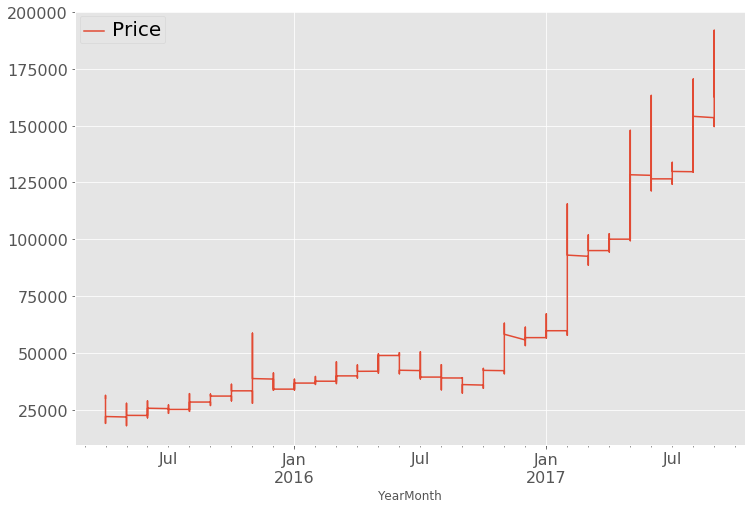

In [12]:
inflation_df = wow_df[["Price", 'YearMonth']]
inflation_df = wow_df.set_index('YearMonth')
plt.style.use('ggplot')
x = np.linspace(0, 2, 100)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
inflation_df.plot(ax=ax, fontsize=16)
legend = ax.get_legend()
legend.prop.set_size(20)

As we can see the point where the price has the most steep increase is on February 2017.

In [32]:
wow_df_before = wow_df[wow_df.YearMonth<pd.Period('2017-02')]
wow_before_model =  ols('Price~YearMonth', data=wow_df_before).fit()
wow_before_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 1.226e+05
Date:                Fri, 12 Jan 2018   Prob (F-statistic):               0.00
Time:                        19:09:38   Log-Likelihood:            -7.8069e+05
No. Observations:               87522   AIC:                         1.561e+06
Df Residuals:                   87500   BIC:                         1.562e+06
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                            2.278e+04     39.621    574.933      0.000    2.27e+04    2.29e+04
YearMonth[T.Period('2015-05', 'M')]   -36.2862     49.896     -0.727      0.467    -134.083      61.510
YearMonth[T.Period('2015-06', 'M')]  1667.2582     49.243     33.858      0.000    1570.743    1763.774
YearMonth[T.Period('2015-07', 'M')]  2223.9864     48.106     46.231      0.000    2129.700    2318.273
YearMonth[T.Period('2015-08', 'M')]  4103.9760     48.106     85.312      0.000    4009.690    4198.262
YearMonth[T.Period('2015-09', 'M')]  6107.2319     48.818    125.101      0.000    6011.548    6202.916
YearMonth[T.Period('2015-10', 'M')]  9547.5388     48.327    197.560      0.000    9452.818    9642.260
YearMonth[T.Period('2015-11', 'M')]  1.408e+04     48.346    291.280      0.000     1.4e+04    1.42e+04
YearMonth[T.Period('2015-12', 'M')]  1.344e+04     48.155    279.034      0.000    1.33e+04    1.35e+04
YearMonth[T.Period('2016-01', 'M')]  1.285e+04     48.055    267.501      0.000    1.28e+04    1.29e+04
YearMonth[T.Period('2016-02', 'M')]  1.461e+04     48.664    300.315      0.000    1.45e+04    1.47e+04
YearMonth[T.Period('2016-03', 'M')]  1.645e+04     49.218    334.259      0.000    1.64e+04    1.65e+04
YearMonth[T.Period('2016-04', 'M')]  1.847e+04     48.400    381.636      0.000    1.84e+04    1.86e+04
YearMonth[T.Period('2016-05', 'M')]  2.341e+04     48.248    485.177      0.000    2.33e+04    2.35e+04
YearMonth[T.Period('2016-06', 'M')]  2.307e+04     48.359    477.076      0.000     2.3e+04    2.32e+04
YearMonth[T.Period('2016-07', 'M')]  1.847e+04     48.495    380.841      0.000    1.84e+04    1.86e+04
YearMonth[T.Period('2016-08', 'M')]  1.503e+04     53.202    282.415      0.000    1.49e+04    1.51e+04
YearMonth[T.Period('2016-09', 'M')]  1.229e+04     48.434    253.675      0.000    1.22e+04    1.24e+04
YearMonth[T.Period('2016-10', 'M')]  1.512e+04     48.130    314.173      0.000     1.5e+04    1.52e+04
YearMonth[T.Period('2016-11', 'M')]  2.684e+04     49.451    542.743      0.000    2.67e+04    2.69e+04
YearMonth[T.Period('2016-12', 'M')]  3.469e+04     49.566    699.802      0.000    3.46e+04    3.48e+04
YearMonth[T.Period('2017-01', 'M')]  3.713e+04     48.381    767.521      0.000     3.7e+04    3.72e+04
==============================================================================
Omnibus:                    27068.401   Durbin-Watson:                   0.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           533122.438
Skew:                           1.000   Prob(JB):                         0.00
Kurtosis:                      14.924   Cond. No.                         31.4
==============================================================================

Warnings

In [33]:
wow_df_after = wow_df[wow_df.YearMonth>=pd.Period('2017-02')]
wow_after_model =  ols('Price~YearMonth', data=wow_df_after).fit()
wow_after_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                 3.316e+04
Date:                Fri, 12 Jan 2018   Prob (F-statistic):               0.00
Time:                        19:10:09   Log-Likelihood:            -2.8728e+05
No. Observations:               27752   AIC:                         5.746e+05
Df Residuals:                   27744   BIC:                         5.746e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                            8.224e+04    120.134    684.547      0.000     8.2e+04    8.25e+04
YearMonth[T.Period('2017-03', 'M')]  1.124e+04    167.480     67.108      0.000    1.09e+04    1.16e+04
YearMonth[T.Period('2017-04', 'M')]  1.674e+04    167.528     99.896      0.000    1.64e+04    1.71e+04
YearMonth[T.Period('2017-05', 'M')]  3.071e+04    166.489    184.481      0.000    3.04e+04     3.1e+04
YearMonth[T.Period('2017-06', 'M')]  4.726e+04    170.381    277.398      0.000    4.69e+04    4.76e+04
YearMonth[T.Period('2017-07', 'M')]    4.6e+04    173.547    265.076      0.000    4.57e+04    4.63e+04
YearMonth[T.Period('2017-08', 'M')]  6.556e+04    202.986    322.996      0.000    6.52e+04     6.6e+04
YearMonth[T.Period('2017-09', 'M')]  7.565e+04    242.393    312.111      0.000    7.52e+04    7.61e+04
==============================================================================
Omnibus:                     2002.763   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9576.507
Skew:                          -0.172   Prob(JB):                         0.00
Kurtosis:                       5.857   Cond. No.                         8.53
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Question 3

In [34]:
credit_df = pd.read_csv('data/creditcard.csv')
credit_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0
